Create a sample dataset for human eyeball identifications and apply computer vision and machine learning for employee identification. 

Follow these steps:

Create a Synthetic Dataset: Since we don't have actual images of human eyeballs for 50 people, we can use synthetic or randomly generated data. For this case, we'll use random image data or small image datasets of human eyes (from online repositories such as OpenCV).

Load and Preprocess the Dataset: The images will need to be preprocessed using OpenCV or another image processing library. This includes resizing, normalizing, and converting them to grayscale if necessary.

Create Labels for the Dataset: Each image will be labeled with a corresponding employee ID or name.

Train a Computer Vision Model: We'll build a simple convolutional neural network (CNN) using TensorFlow or PyTorch to classify the eyeball images and match them to the correct employee.

Deep Learning using Adam and SGD optimizer for comparison.

Implementation in a Jupyter notebook using TensorFlow and OpenCV:

In [77]:
# Remember to install first
# !pip install tensorflow-addons
# pip install tensorflow scikit-learn matplotlib
# !pip install opencv-python

Epoch 1/10
2/2 [==============================] - 2s 331ms/step - loss: 4.0119 - accuracy: 0.0750 - val_loss: 4.3642 - val_accuracy: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 0s 98ms/step - loss: 3.8846 - accuracy: 0.0250 - val_loss: 4.3034 - val_accuracy: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 0s 90ms/step - loss: 3.8625 - accuracy: 0.0250 - val_loss: 4.2391 - val_accuracy: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 0s 80ms/step - loss: 3.8210 - accuracy: 0.0250 - val_loss: 4.2021 - val_accuracy: 0.0000e+00
Epoch 5/10
2/2 [==============================] - 0s 78ms/step - loss: 3.7882 - accuracy: 0.0750 - val_loss: 4.2325 - val_accuracy: 0.0000e+00
Epoch 6/10
2/2 [==============================] - 0s 84ms/step - loss: 3.7463 - accuracy: 0.0250 - val_loss: 4.3435 - val_accuracy: 0.0000e+00
Epoch 7/10
2/2 [==============================] - 0s 94ms/step - loss: 3.6996 - accuracy: 0.0250 - val_loss: 4.5302 - val_accuracy: 0.0000e+0

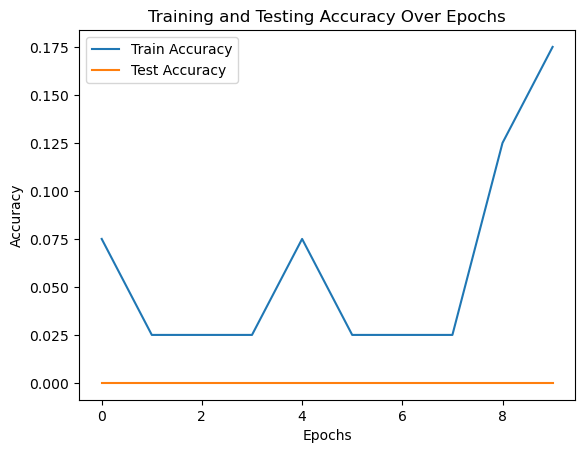

1/1 [==============================] - 0s 105ms/step


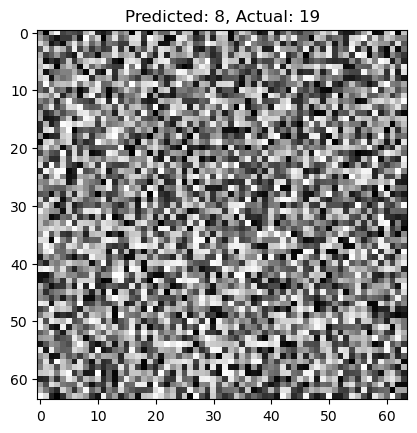

In [11]:
# Import required libraries
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import SGD, Adam

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Step 1: Synthetic Dataset Generation (Normally you'd use real images)
# Create random synthetic images (simulating eyeball images for 50 persons)
def generate_synthetic_eyeball_images(num_images=50, img_size=(64, 64)):
    images = []
    labels = []
    
    for i in range(num_images):
        # Generate random grayscale image to simulate an eye
        img = np.random.randint(0, 256, img_size, dtype=np.uint8)
        label = i  # Assign a unique label for each 'person'
        images.append(img)
        labels.append(label)
    
    return np.array(images), np.array(labels)

# Generate 50 random 'eyeball' images
images, labels = generate_synthetic_eyeball_images(50)

# Step 2: Data Preprocessing
# Resize and normalize the images
images_resized = np.array([cv2.resize(img, (64, 64)) for img in images])
images_resized = images_resized / 255.0  # Normalize pixel values

# Reshape the data for CNN input (adding a channel dimension for grayscale)
images_resized = np.expand_dims(images_resized, axis=-1)

# One-hot encode the labels for classification
labels_onehot = to_categorical(labels, num_classes=50)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(images_resized, labels_onehot, test_size=0.2, random_state=42)


# Step 4: Build a CNN Model for Image Classification with Input layer
model = Sequential([
    Input(shape=(64, 64, 1)),  # Define the input shape explicitly
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(50, activation='softmax')  # Output layer for 50 classes (people)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Step 7: Visualize Results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Training and Testing Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Step 8: Predict on a random test image
random_idx = random.randint(0, X_test.shape[0] - 1)
test_img = X_test[random_idx]
predicted_label = model.predict(np.expand_dims(test_img, axis=0))
predicted_class = np.argmax(predicted_label)

plt.imshow(test_img.squeeze(), cmap='gray')
plt.title(f'Predicted: {predicted_class}, Actual: {np.argmax(y_test[random_idx])}')
plt.show()

Epoch 1/20
2/2 [==============================] - 4s 456ms/step - loss: 8.1486 - accuracy: 0.0250 - val_loss: 3.9084 - val_accuracy: 0.0000e+00
Epoch 2/20
2/2 [==============================] - 0s 101ms/step - loss: 6.0586 - accuracy: 0.0500 - val_loss: 3.9098 - val_accuracy: 0.0000e+00
Epoch 3/20
2/2 [==============================] - 0s 106ms/step - loss: 4.0902 - accuracy: 0.0500 - val_loss: 3.9125 - val_accuracy: 0.0000e+00
Epoch 4/20
2/2 [==============================] - 0s 123ms/step - loss: 3.8540 - accuracy: 0.1250 - val_loss: 3.9148 - val_accuracy: 0.0000e+00
Epoch 5/20
2/2 [==============================] - 0s 121ms/step - loss: 3.3306 - accuracy: 0.2250 - val_loss: 3.9258 - val_accuracy: 0.0000e+00
Epoch 6/20
2/2 [==============================] - 0s 115ms/step - loss: 3.5451 - accuracy: 0.0750 - val_loss: 3.9544 - val_accuracy: 0.0000e+00
Epoch 7/20
2/2 [==============================] - 0s 114ms/step - loss: 2.8304 - accuracy: 0.2500 - val_loss: 4.0018 - val_accuracy: 0.0

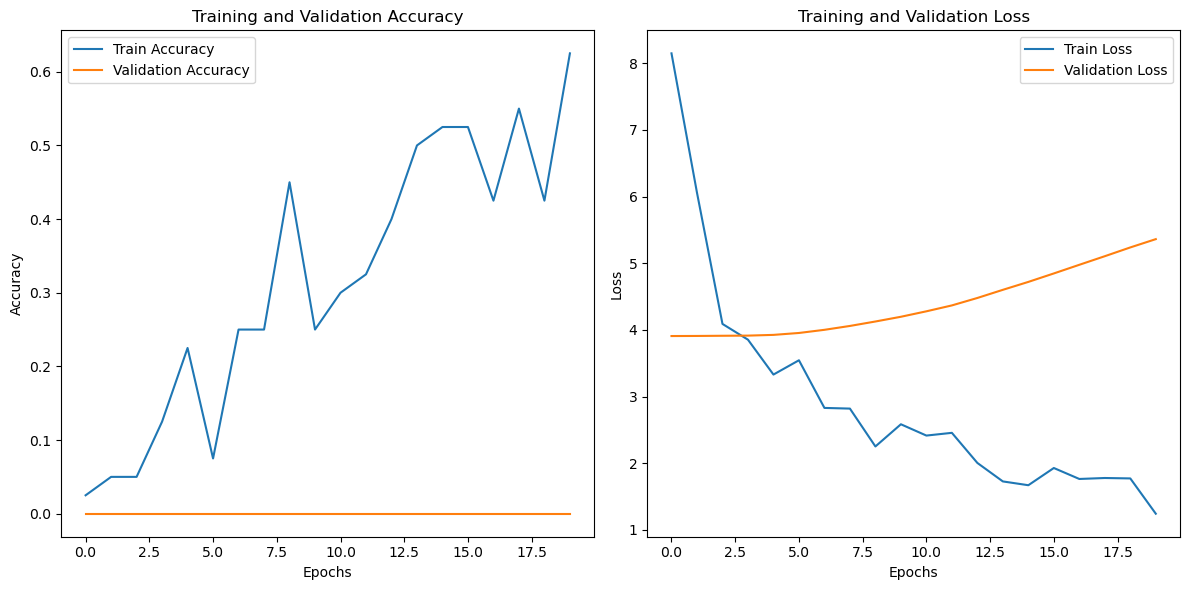

1/1 [==============================] - 0s 483ms/step


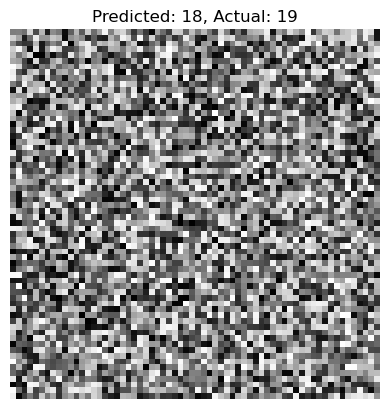

In [14]:
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Step 1: Synthetic Dataset Generation (if not already done)
def generate_synthetic_eyeball_images(num_images=50, img_size=(64, 64)):
    images = []
    labels = []
    
    for i in range(num_images):
        img = np.random.randint(0, 256, img_size, dtype=np.uint8)
        label = i
        images.append(img)
        labels.append(label)
    
    return np.array(images), np.array(labels)

# Generate 50 random 'eyeball' images
images, labels = generate_synthetic_eyeball_images(50)

# Step 2: Data Preprocessing
images_resized = np.array([cv2.resize(img, (64, 64)) for img in images])
images_resized = images_resized / 255.0  # Normalize pixel values
images_resized = np.expand_dims(images_resized, axis=-1)  # Add channel dimension
labels_onehot = to_categorical(labels, num_classes=50)  # One-hot encode labels

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(images_resized, labels_onehot, test_size=0.2, random_state=42)

# Step 4: Build a Deeper CNN Model for Image Classification
model = Sequential([
    Input(shape=(64, 64, 1)),  # Define input shape
    
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    
    Dense(256, activation='relu'),
    Dropout(0.5),  # Dropout for regularization
    Dense(128, activation='relu'),
    Dropout(0.5),  # Another dropout layer for regularization
    Dense(50, activation='softmax')  # Output layer for 50 classes (people)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model with an increased number of epochs
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))  # Increased epochs

# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Step 7: Visualize Training History
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Step 8: Predict on a random test image
random_idx = random.randint(0, X_test.shape[0] - 1)  # Define random_idx here
test_img = X_test[random_idx]
predicted_label = model.predict(np.expand_dims(test_img, axis=0))
predicted_class = np.argmax(predicted_label)

plt.imshow(test_img.squeeze(), cmap='gray')
plt.title(f'Predicted: {predicted_class}, Actual: {np.argmax(y_test[random_idx])}')
plt.axis('off')  # Hide axis
plt.show()


Epoch 1/20
2/2 [==============================] - 2s 456ms/step - loss: 6.7560 - accuracy: 0.0000e+00 - val_loss: 3.9261 - val_accuracy: 0.0000e+00
Epoch 2/20
2/2 [==============================] - 0s 106ms/step - loss: 5.3236 - accuracy: 0.0250 - val_loss: 4.0330 - val_accuracy: 0.0000e+00
Epoch 3/20
2/2 [==============================] - 0s 108ms/step - loss: 4.8443 - accuracy: 0.0500 - val_loss: 4.6494 - val_accuracy: 0.0000e+00
Epoch 4/20
2/2 [==============================] - 0s 95ms/step - loss: 4.4150 - accuracy: 0.0000e+00 - val_loss: 7.0811 - val_accuracy: 0.0000e+00
Epoch 5/20
2/2 [==============================] - 0s 106ms/step - loss: 4.2645 - accuracy: 0.0250 - val_loss: 9.7467 - val_accuracy: 0.0000e+00
Epoch 6/20
2/2 [==============================] - 0s 110ms/step - loss: 3.9379 - accuracy: 0.0750 - val_loss: 14.0038 - val_accuracy: 0.0000e+00
Epoch 7/20
2/2 [==============================] - 0s 98ms/step - loss: 3.9586 - accuracy: 0.1250 - val_loss: 25.7572 - val_accur

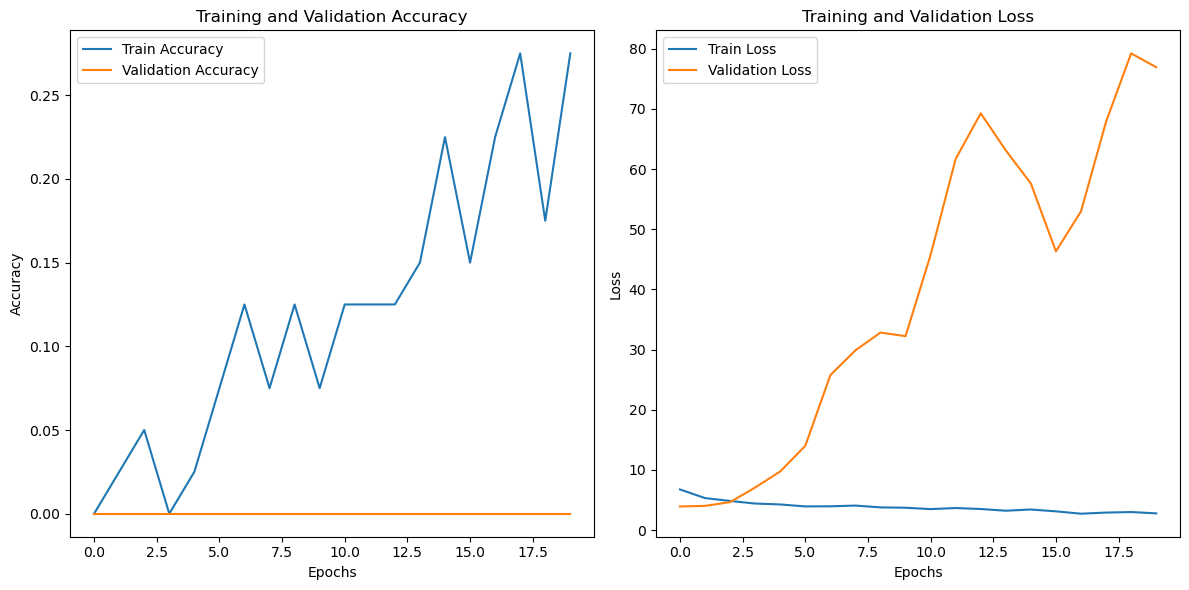

1/1 [==============================] - 0s 196ms/step


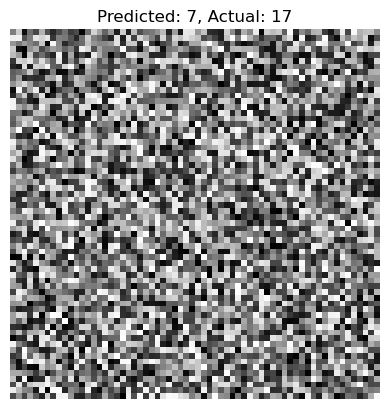

In [17]:
# Step 4: Build a Deeper CNN Model for Image Classification
model = Sequential([
    Input(shape=(64, 64, 1)),  # Define input shape
    
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    
    Dense(256, activation='relu'),
    Dropout(0.5),  # Dropout for regularization
    Dense(128, activation='relu'),
    Dropout(0.5),  # Another dropout layer for regularization
    Dense(50, activation='softmax')  # Output layer for 50 classes (people)
])

# Compile the model with SGD optimizer
sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9)  # You can adjust the learning rate and momentum
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))  # Increased epochs

# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Step 7: Visualize Training History
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Step 8: Predict on a random test image
random_idx = random.randint(0, X_test.shape[0] - 1)  # Define random_idx here
test_img = X_test[random_idx]
predicted_label = model.predict(np.expand_dims(test_img, axis=0))
predicted_class = np.argmax(predicted_label)

plt.imshow(test_img.squeeze(), cmap='gray')
plt.title(f'Predicted: {predicted_class}, Actual: {np.argmax(y_test[random_idx])}')
plt.axis('off')  # Hide axis
plt.show()

In [18]:
# Define the Adam optimizer
adam_optimizer = Adam(learning_rate=0.001)

# Compile the model with Adam
model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_adam = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Define the SGD optimizer
sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model with SGD
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_sgd = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
2/2 [==============================] - 4s 548ms/step - loss: 2.4538 - accuracy: 0.2750 - val_loss: 54.7922 - val_accuracy: 0.0000e+00
Epoch 2/20
2/2 [==============================] - 0s 103ms/step - loss: 2.5915 - accuracy: 0.3250 - val_loss: 55.6868 - val_accuracy: 0.0000e+00
Epoch 3/20
2/2 [==============================] - 0s 113ms/step - loss: 2.2754 - accuracy: 0.3750 - val_loss: 49.5383 - val_accuracy: 0.0000e+00
Epoch 4/20
2/2 [==============================] - 0s 118ms/step - loss: 1.8982 - accuracy: 0.4750 - val_loss: 45.9741 - val_accuracy: 0.0000e+00
Epoch 5/20
2/2 [==============================] - 0s 125ms/step - loss: 2.2881 - accuracy: 0.3000 - val_loss: 39.0387 - val_accuracy: 0.0000e+00
Epoch 6/20
2/2 [==============================] - 0s 147ms/step - loss: 2.1821 - accuracy: 0.4500 - val_loss: 33.9997 - val_accuracy: 0.0000e+00
Epoch 7/20
2/2 [==============================] - 0s 132ms/step - loss: 2.0935 - accuracy: 0.5500 - val_loss: 29.0826 - val_accura

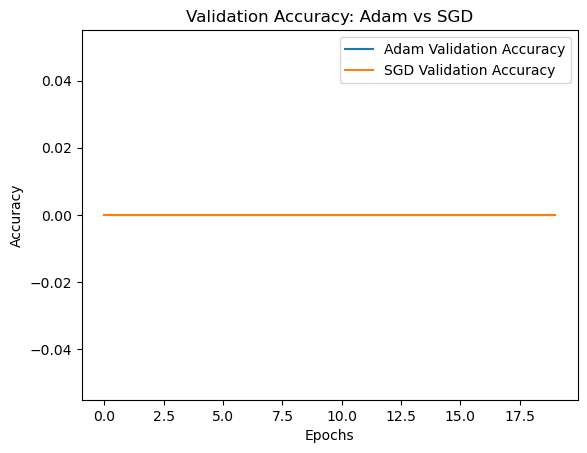

In [19]:
# Plot the training and validation accuracy for both optimizers
plt.plot(history_adam.history['val_accuracy'], label='Adam Validation Accuracy')
plt.plot(history_sgd.history['val_accuracy'], label='SGD Validation Accuracy')
plt.title('Validation Accuracy: Adam vs SGD')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [20]:
# Example of adjusting learning rate
adam_optimizer = Adam(learning_rate=0.0001)  # Lower learning rate
sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9)  # Check for different values


In [21]:
# Increase the number of epochs
history_adam = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))
history_sgd = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
2/2 [==============================] - 0s 165ms/step - loss: 0.7069 - accuracy: 0.7750 - val_loss: 10.7080 - val_accuracy: 0.0000e+00
Epoch 2/50
2/2 [==============================] - 0s 126ms/step - loss: 1.3872 - accuracy: 0.6500 - val_loss: 9.4774 - val_accuracy: 0.0000e+00
Epoch 3/50
2/2 [==============================] - 0s 115ms/step - loss: 0.9892 - accuracy: 0.7250 - val_loss: 9.5285 - val_accuracy: 0.0000e+00
Epoch 4/50
2/2 [==============================] - 0s 102ms/step - loss: 1.1980 - accuracy: 0.7250 - val_loss: 9.9461 - val_accuracy: 0.0000e+00
Epoch 5/50
2/2 [==============================] - 0s 119ms/step - loss: 1.4562 - accuracy: 0.6250 - val_loss: 10.0283 - val_accuracy: 0.0000e+00
Epoch 6/50
2/2 [==============================] - 0s 139ms/step - loss: 0.6059 - accuracy: 0.8000 - val_loss: 9.5551 - val_accuracy: 0.0000e+00
Epoch 7/50
2/2 [==============================] - 0s 112ms/step - loss: 1.4075 - accuracy: 0.5750 - val_loss: 7.5873 - val_accuracy: 0

In [22]:
# Example of adding more dropout
model.add(Dropout(0.5))  # Increase dropout rate if overfitting


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)

# Fit the model using the data generator
model.fit(datagen.flow(X_train, y_train, batch_size=32), 
          validation_data=(X_test, y_test), 
          epochs=50)


Epoch 1/50
2/2 [==============================] - 1s 176ms/step - loss: 11.5157 - accuracy: 0.0500 - val_loss: 18.5370 - val_accuracy: 0.0000e+00
Epoch 2/50
2/2 [==============================] - 0s 203ms/step - loss: 10.6885 - accuracy: 0.0500 - val_loss: 17.7703 - val_accuracy: 0.0000e+00
Epoch 3/50
2/2 [==============================] - 0s 226ms/step - loss: 11.2028 - accuracy: 0.0250 - val_loss: 17.9280 - val_accuracy: 0.0000e+00
Epoch 4/50
2/2 [==============================] - 0s 153ms/step - loss: 10.1931 - accuracy: 0.0500 - val_loss: 16.9337 - val_accuracy: 0.0000e+00
Epoch 5/50
2/2 [==============================] - 0s 218ms/step - loss: 9.5955 - accuracy: 0.0500 - val_loss: 21.4757 - val_accuracy: 0.0000e+00
Epoch 6/50
2/2 [==============================] - 0s 240ms/step - loss: 12.1634 - accuracy: 0.0000e+00 - val_loss: 16.5709 - val_accuracy: 0.0000e+00
Epoch 7/50
2/2 [==============================] - 0s 126ms/step - loss: 12.0109 - accuracy: 0.0000e+00 - val_loss: 13.336

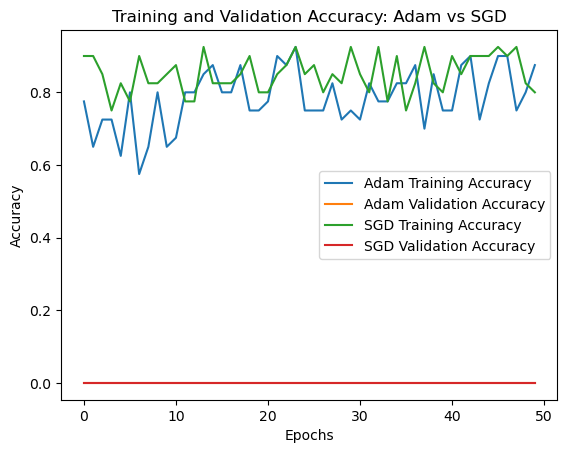

In [24]:
# Plot both training and validation accuracy for comparison
plt.plot(history_adam.history['accuracy'], label='Adam Training Accuracy')
plt.plot(history_adam.history['val_accuracy'], label='Adam Validation Accuracy')
plt.plot(history_sgd.history['accuracy'], label='SGD Training Accuracy')
plt.plot(history_sgd.history['val_accuracy'], label='SGD Validation Accuracy')
plt.title('Training and Validation Accuracy: Adam vs SGD')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
